In [1]:
#Importing Libraries
import numpy as np
import pandas as pd


# Plotly Packages
from plotly import tools
from chart_studio import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats

# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load dataframe
df = pd.read_csv("insurance.csv")
df.head()

# Store the original dataframe in another variable.
original_df = df.copy()

In [3]:
#See our dataframe colums and first five rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Checking if there is missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#We have a right skewed distribution in which most patients are being charged between  2000− 12000. 
#Using Logarithms: Logarithms helps us have a normal distribution which could help us in a number of different ways such as outlier detection, implementation of statistical concepts based on the central limit theorem and for our predictive model
# Determine the distribution of charge
charge_dist = df["charges"].values
logcharge = np.log(df["charges"])

trace0 = go.Histogram(
    x=charge_dist,
    histnorm='probability',
    name="Charges Distribution",
    marker = dict(
        color = '#FA5858',
    )
)
trace1 = go.Histogram(
    x=logcharge,
    histnorm='probability',
    name="Charges Distribution using Log",
    marker = dict(
        color = '#58FA82',
    )
)

fig = tools.make_subplots(rows=2, cols=1,
                          subplot_titles=('Charge Distribution','Log Charge Distribution'),
                         print_grid=False)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)

fig['layout'].update(showlegend=True, title='Charge Distribution', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [7]:
#Turning Age into Categorical Variables:
#Young Adult: from 18 - 35
#Senior Adult: from 36 - 55
#Elder: 56 or older

df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    
    
labels = df["age_cat"].unique().tolist()
amount = df["age_cat"].value_counts().tolist()

colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

data = [trace]
layout = go.Layout(title="Amount by Age Category")

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic_pie_chart')

In [8]:
#BMI (Body Mass Index) frequency: Most of the BMI frequency is concentrated between 27 - 33.
bmi = [df["bmi"].values.tolist()]
group_labels = ['Body Mass Index Distribution']

colors = ['#FA5858']

fig = ff.create_distplot(bmi, group_labels, colors=colors)
# Add title
fig['layout'].update(title='Normal Distribution <br> Central Limit Theorem Condition')

iplot(fig, filename='Basic Distplot')

In [9]:
#Correlation heatmap
corr = df.corr()

hm = go.Heatmap(
    z=corr.values,
    x=corr.index.values.tolist(),
    y=corr.index.values.tolist()
)


data = [hm]
layout = go.Layout(title="Correlation Heatmap")

fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')

In [12]:
#Relationship betweem BMI and Age: The correlation for these two variables is 0.10 which is not that great.
#Therefore, we can disregard that age has a huge influence on BMI.

young_adults = df["bmi"].loc[df["age_cat"] == "Young Adult"].values
senior_adult = df["bmi"].loc[df["age_cat"] == "Senior Adult"].values
elders = df["bmi"].loc[df["age_cat"] == "Elder"].values
trace0 = go.Box(
    y=young_adults,
    name = 'Young Adults',
    boxmean= True,
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=senior_adult,
    name = 'Senior Adults',
    boxmean= True,
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)

trace2 = go.Box(
    y=elders,
    name = 'Elders',
    boxmean= True,
    marker = dict(
        color = 'rgb(247, 186, 166)',
    )
)

data = [trace0, trace1, trace2]
layout = go.Layout(title="Body Mass Index <br> by Age Category", xaxis=dict(title="Age Category", titlefont=dict(size=16)),
                  yaxis=dict(title="Body Mass Index", titlefont=dict(size=16)))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [13]:
#Comparing Independent Categorical Variables (ANOVA)
#P-value: The p-value being higher than 0.05 tells us that we take the Null hypothesis, meaning that there is no a significant change between the three age categories when it comes to Body Mass Index.

import statsmodels.api as sm
from statsmodels.formula.api import ols

moore_lm = ols("bmi ~ age_cat", data=df).fit()
print(moore_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.949
Date:                Sun, 22 May 2022   Prob (F-statistic):            0.00268
Time:                        14:31:52   Log-Likelihood:                -4311.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1335   BIC:                             8644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [14]:
#Patient Charge Mean: For young adults it is 7,944, for Senior Adults it is 14,785 and for the elder it is 18,795.
#Patient Charge Median: For young adults it is 4,252, for Senior Adults it is 9,565 and for the elder it is 13,429.
#Mean and the Median: Sometimes we must be careful when using the mean since it is prone to be affected by outliers.

# Mean could be affected easily by outliers or extreme cases.
# Means
avg_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].mean()
avg_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].mean()
avg_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].mean()

# Median
med_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].median()
med_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].median()
med_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].median()

average_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge],
    name='Mean',
    marker=dict(
        color="#F5B041"
    )
)
med_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[med_ya_charge, med_sa_charge, med_e_charge],
    name='Median',
    marker=dict(
        color="#48C9B0"
    )
)


fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by Age','Median Charge by Age'),
                         shared_yaxes=True, print_grid=False)


fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)


fig['layout'].update(showlegend=True, title='Age Charges', xaxis=dict(title="Age Category"), yaxis=dict(title="Patient Charges"), bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [15]:
#Turning BMI into Categorical Variables:
#Under Weight: Body Mass Index (BMI)  <  18.5
#Normal Weight: Body Mass Index (BMI)  ≥  18.5 and Body Mass Index (BMI)  <  24.9
#Overweight: Body Mass Index (BMI)  ≥  25 and Body Mass Index (BMI)  <  29.9
#Obese: Body Mass Index (BMI)  >  30

df["weight_condition"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


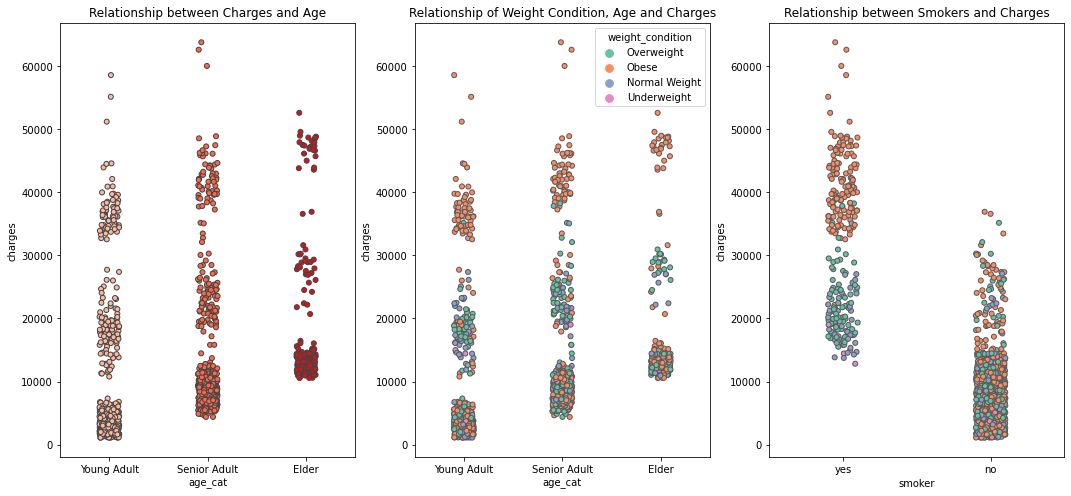

In [16]:
# Create subpplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

# I wonder if the cluster that is on the top is from obese people
sns.stripplot(x="age_cat", y="charges", data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Charges and Age")


sns.stripplot(x="age_cat", y="charges", hue="weight_condition", data=df, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of Weight Condition, Age and Charges")

sns.stripplot(x="smoker", y="charges", hue="weight_condition", data=df, ax=ax3, linewidth=1, palette="Set2")
ax3.legend_.remove()
ax3.set_title("Relationship between Smokers and Charges")

plt.show()

In [17]:
# Make sure we don't have any null values
df[df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition


In [18]:
#Overweight: Notice how there are two groups of people that get significantly charged more than the other group of overweight people.
#Obese: Same thing goes with the obese group, were a significant group is charged more than the other group.

fig = ff.create_facet_grid(
    df,
    x='age',
    y='charges',
    color_name='weight_condition',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'Underweight': 'rgb(208, 246, 130)', 'Normal Weight': 'rgb(166, 246, 130)',
             'Overweight': 'rgb(251, 232, 238)', 'Obese': 'rgb(253, 45, 28)'}
)
251, 232, 238


fig['layout'].update(title="Weight Status vs Charges", width=800, height=600, plot_bgcolor='rgb(251, 251, 251)', 
                     paper_bgcolor='rgb(255, 255, 255)')


iplot(fig, filename='facet - custom colormap')

In [19]:
# Creating new column charge_status with above and below average charge

obese_avg = df["charges"].loc[df["weight_condition"] == "Obese"].mean()

df["charge_status"] = np.nan
lst = [df]


for col in lst:
    col.loc[col["charges"] > obese_avg, "charge_status"] = "Above Average"
    col.loc[col["charges"] < obese_avg, "charge_status"] = "Below Average"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition,charge_status
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,Above Average
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese,Below Average
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese,Below Average
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight,Above Average
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight,Below Average


In [20]:
# No Nulls
df["charge_status"].isnull().sum()

0

Text(0.5, 1.0, 'Smokers')

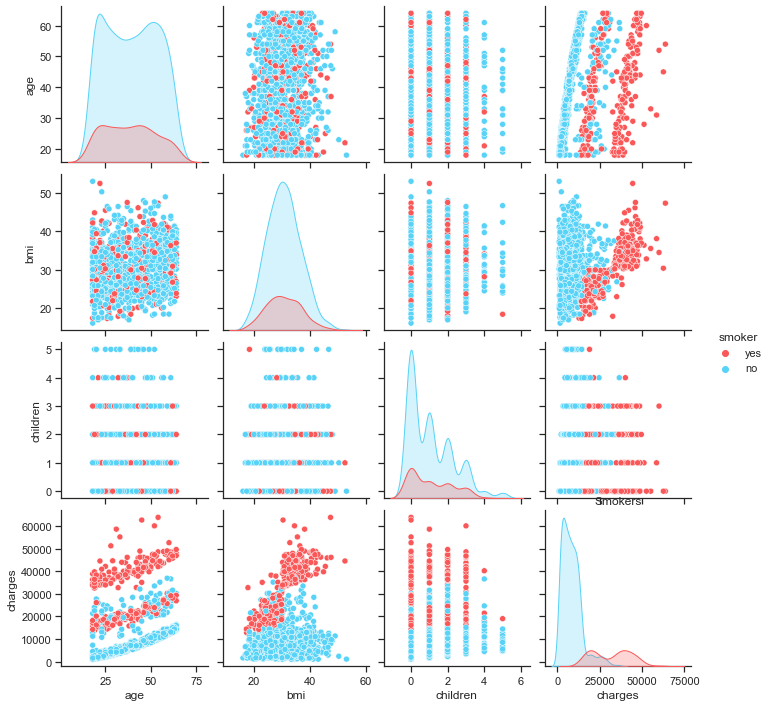

In [21]:
#Obesity and the Impact of Smoking to the Wallet:
#We can notice in the charges box how smoking looks to have a certain impact on medical costs.
#With plots we can find out how much of a difference there is between the group of obese patients that smoke compared to the group of obese patients that don't smoke.

import seaborn as sns
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="smoker", palette=pal)
plt.title("Smokers")

In [22]:
#Distribution of Charges (Obese Smoker vs Obese non-Smoker)
#Violin Plots: We will be using violin plots to compare the distributions of patients of the obese group who are smokers and non-smokers.
#Obese smokers distribution: Most obese smokers pay around 40.000 in medical costs!
#Obese non-smokers distribution: Most obese non-smokers pay 8.000 in medical costs.
#Smoking a factor to the wallet Smoking is defninitely a big factor for obese patients when it comes to medical cost. A difference of more than 30.000!

pointspossmoker = [-0.9,-1.1,-0.6,-0.3]
pointposnonsmoker = [0.45,0.55,1,0.4]
showLegend = [True,False,False,False]

data = []
for i in range(0,len(pd.unique(df['weight_condition']))):
    male = {
            "type": 'violin',
            "x": df['weight_condition'][ (df['smoker'] == 'yes') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "y": df['charges'][ (df['smoker'] == 'yes') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "legendgroup": 'Smoker',
            "scalegroup": 'Smoker',
            "name": 'Smoker',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "points": 'all',
            "pointpos": pointspossmoker[i],
            "jitter": 0,
            "scalemode": 'count',
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#DF0101'
            },
            "marker": {
                "line": {
                    "width": 2,
                    "color": '#F78181'
                }
            },
            "span": [
                0
            ],
            "showlegend": showLegend[i]
        }
    data.append(male)
    female = {
            "type": 'violin',
            "x": df['weight_condition'] [ (df['smoker'] == 'no') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "y": df['charges'] [ (df['smoker'] == 'no') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "legendgroup": 'Non-Smoker',
            "scalegroup": 'Non-Smoker',
            "name": 'Non-Smoker',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "points": 'all',
            "pointpos": pointposnonsmoker[i],
            "jitter": 0,
            "scalemode": 'count',
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#00FF40'
            },
            "marker": {
                "line": {
                    "width": 2,
                    "color": '#81F781'
                }
            },
            "span": [
                0
            ],
            "showlegend": showLegend[i]
        }
    data.append(female)
        

fig = {
    "data": data,
    "layout" : {
        "title": "Charges Distribution of Obese Patients<br><i>Group by Smoking Status",
        "yaxis": {
            "zeroline": False,
            "title": "Patient Charges",
            "titlefont": {
                "size": 16
            }
        },
        "violingap": 0,
        "violingroupgap": 0,
        "violinmode": "overlay"
    }
}


iplot(fig, filename='violin/advanced', validate = False)

In [23]:
#Separation in Charges between Obese Smokers vs Non-Obese Smokers
#In this chart we can visualize how can separate obese smokers and obese non-smokers into different clusters of groups. 
#Therefore, we can say that smoking is a characteristic that definitely affects patient's charges.

# Create a Scatter Plot with all the Obese
obese_smoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")]
obese_nonsmoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")]


trace0 = go.Scatter(
    x = obese_smoker["age"].values,
    y = obese_smoker["charges"].values,
    name = 'Smokers',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = '#DF0101',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = obese_nonsmoker["age"].values,
    y = obese_nonsmoker["charges"].values,
    name = 'Non-Smokers',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = '#00FF40',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Clear Separation between Obese Smokers and Non-Smokers in Charges',
              yaxis = dict(zeroline = False,
                          title="Patient Charges",
                          titlefont=dict(size=16)),
              xaxis = dict(zeroline = False,
                          title="Age of the Patient",
                          titlefont=dict(
                          size=16))
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

Text(17, 40000, 'The Impact of Smoking to \n Charges on other \n Weight Conditions ')

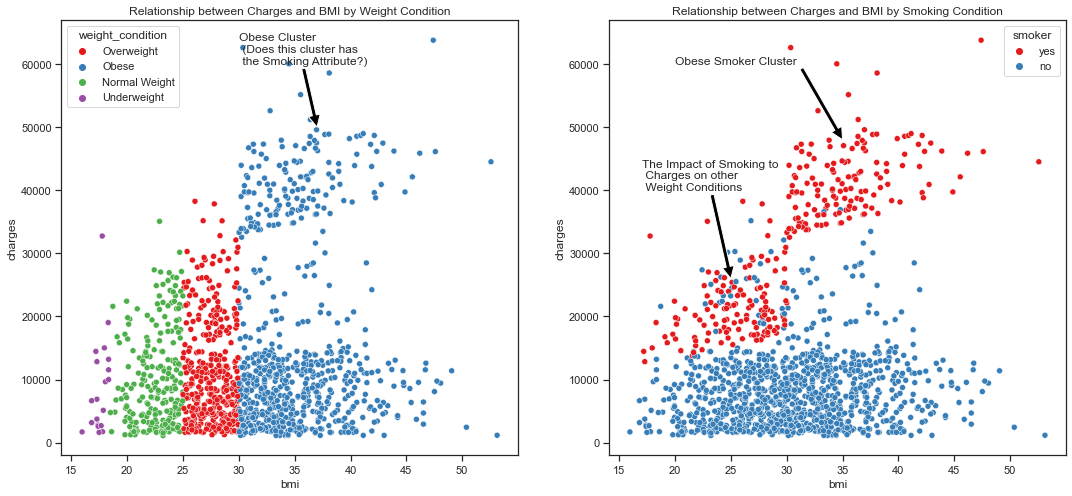

In [24]:
# Two subplots one with weight condition and the other with smoker.

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="weight_condition", data=df, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by Weight Condition")
ax1.annotate('Obese Cluster \n (Does this cluster has \n the Smoking Attribute?)', xy=(37, 50000), xytext=(30, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and BMI by Smoking Condition")
ax2.annotate('Obese Smoker Cluster ', xy=(35, 48000), xytext=(20, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
ax2.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(25, 26000), xytext=(17, 40000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)

In [25]:
# BMI + Children / Age
df["stress_level"] = df["children"] * df["age"] / df["bmi"]

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition,charge_status,stress_level
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,Above Average,0.000000
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese,Below Average,0.533017
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese,Below Average,2.545455
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight,Above Average,0.000000
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight,Below Average,0.000000


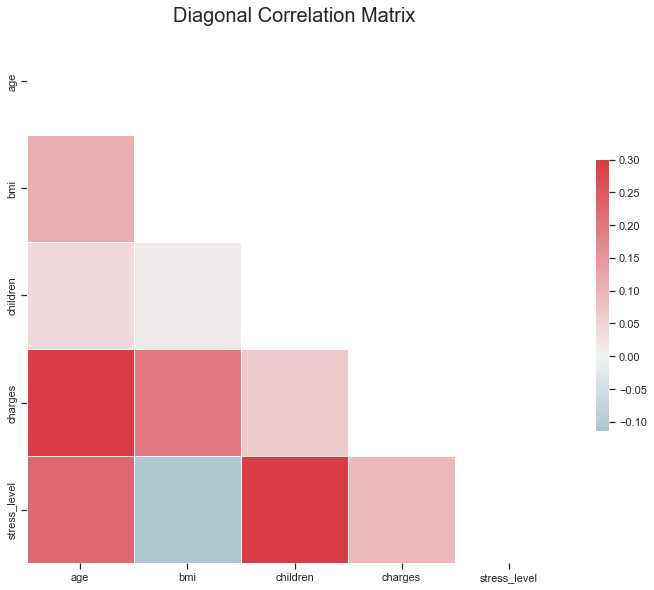

In [26]:
#Diagonal Correlation Matrix

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Diagonal Correlation Matrix", fontsize=20)

plt.show()

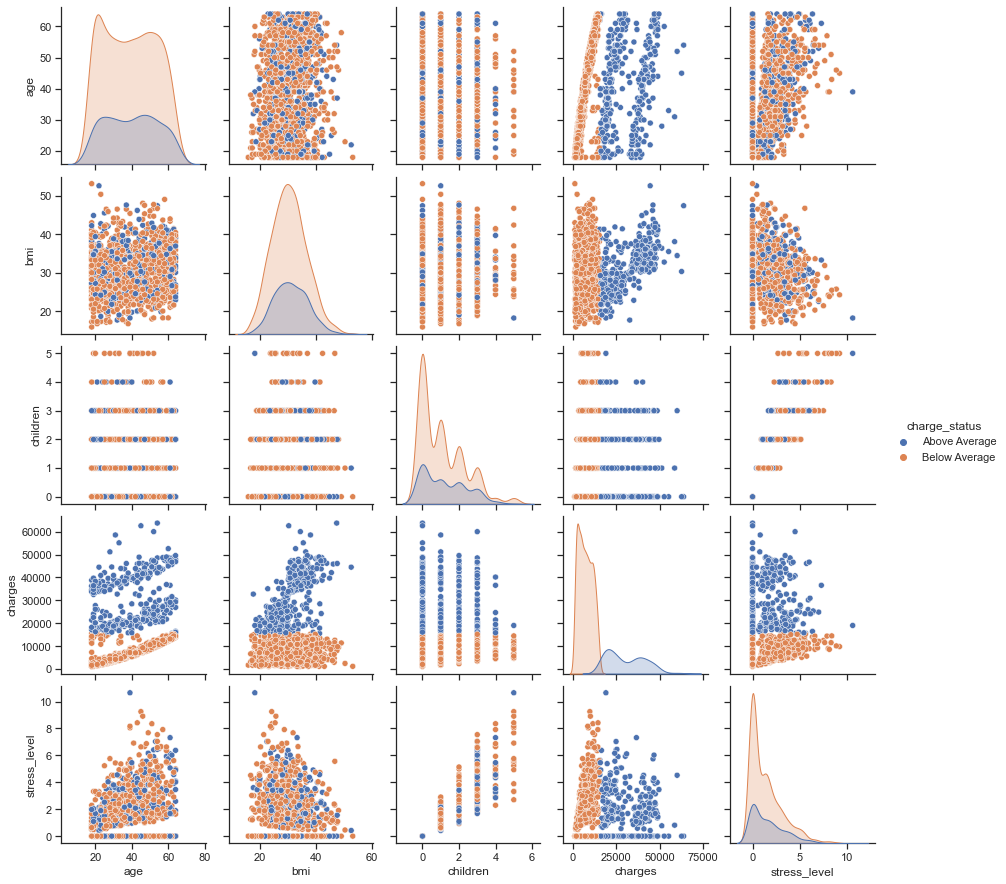

In [27]:
# pd.scatter_matrix(df, figsize=(12, 8))
sns.pairplot(df,hue="charge_status")
plt.show()

In [28]:
#KMeans Clustering

#Import KMeans
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
df.head()
original_df.head()

X = df[["bmi", "charges"]]


# Instantiate the clustering model and visualizer
model = KMeans()

<Figure size 864x576 with 0 Axes>

In [29]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)

KMeans(n_clusters=3)

In [31]:
#Printing the Centroids
print(kmeans.cluster_centers_)

[[3.04217430e+01 6.17738257e+03]
 [3.48018405e+01 4.06923629e+04]
 [2.92123839e+01 1.81419192e+04]]


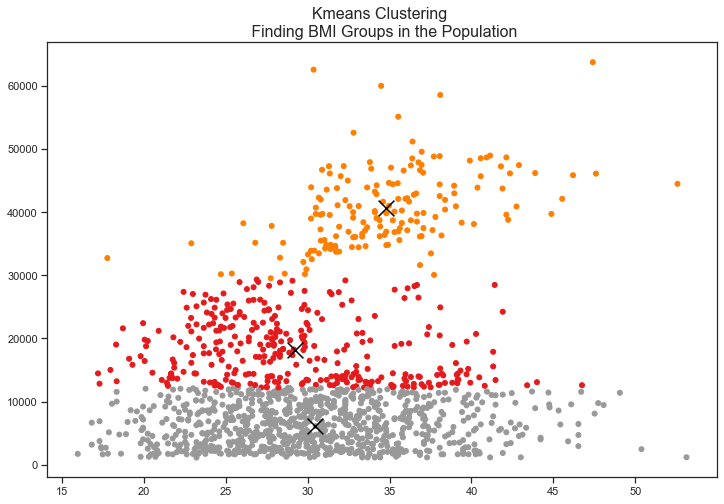

In [33]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding BMI Groups in the Population", fontsize=16)
plt.show()

In [34]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

X = df[["bmi", "charges"]]

agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(X)
agglomerative_clustering

AgglomerativeClustering(n_clusters=4)

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 5% of the data 
sample_df = df.sample(frac=.05)

sample_X = sample_df[["bmi", "charges"]]

sample_agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(sample_X)
sample_agglomerative_clustering


linked = linkage(sample_agglomerative_clustering.children_, 'single')

In [36]:
agglomerative_clustering.labels_

array([2, 3, 3, ..., 3, 3, 2], dtype=int64)

In [37]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


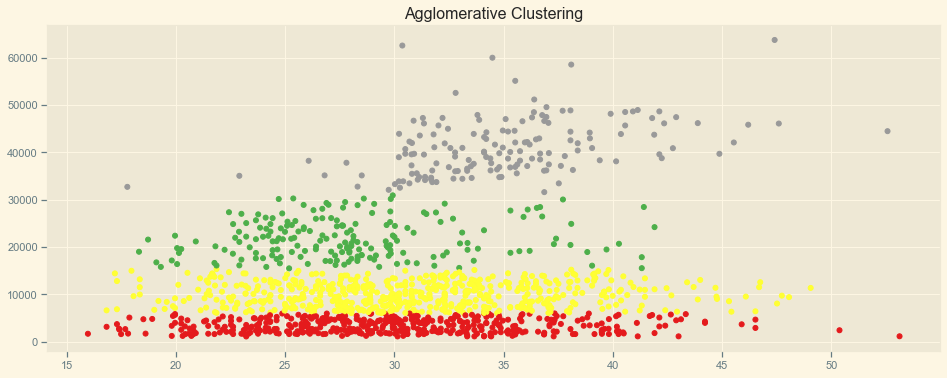

In [38]:
plt.style.use("Solarize_Light2")

fig, (ax1) = plt.subplots(ncols=1, figsize=(16,6))

ax1.scatter(X.values[:,0], X.values[:,1], c=agglomerative_clustering.labels_, cmap="Set1_r", s=25)
ax1.set_title("Agglomerative Clustering", fontsize=16)


plt.show()